In [ ]:
def plot_wave(file, title):
  y, sr = librosa.load(file)
  plt.figure()
  librosa.display.waveplot(y, sr=sr)
  plt.title(title)
  plt.show()

def plot_spectogram(audio_data, fs, title):
  plt.specgram(audio_data, Fs=fs)
  plt.xlabel('Time')
  plt.title(title)
  plt.show()

def psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return 100
    max_value = np.max(original)
    return 20 * np.log10(max_value / np.sqrt(mse))

def display_psnr():
    fs1, original_data = wf.read('/content/original.wav')
    fs2, denoised_data = wf.read('/content/output.wav')

    psnr_value = psnr(original_data, denoised_data)
    print("PSNR (Peak signal-to-noise ratio): ", abs(psnr_value), " dB")

In [ ]:
!pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


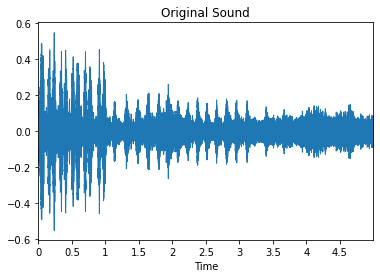

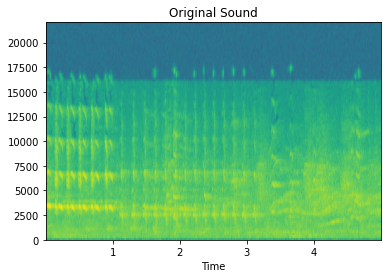

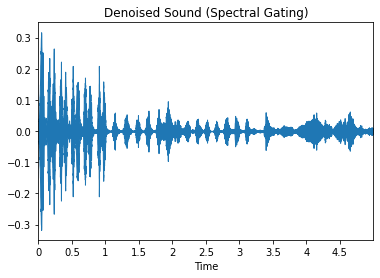

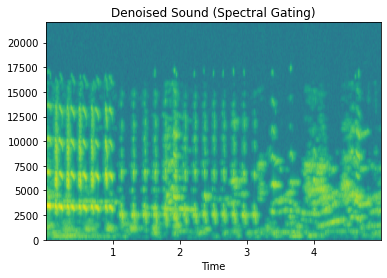

PSNR (Peak signal-to-noise ratio):  55.23517133509625  dB


In [ ]:
import numpy as np
import noisereduce as nr
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal

fs, audio_data = wf.read('/content/original.wav')
audio_data = np.array(audio_data)

def denoise(audio_data, fs):
	denoised_data = nr.reduce_noise(audio_data, fs)
	return denoised_data

plot_wave('/content/original.wav', 'Original Sound')

plot_spectogram(audio_data, fs, 'Original Sound')

denoised_data = denoise(audio_data, fs)

wf.write('/content/output.wav', fs, denoised_data)

plot_wave('/content/output.wav', 'Denoised Sound (Spectral Gating)')

plot_spectogram(denoised_data, fs, 'Denoised Sound (Spectral Gating)')

display_psnr()

<ipython-input-5-87f539fdb92e>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  denoised_data = ifft(denoised_magnitude).astype(np.int16)


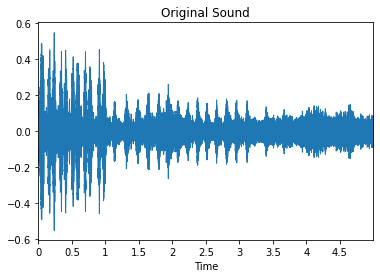

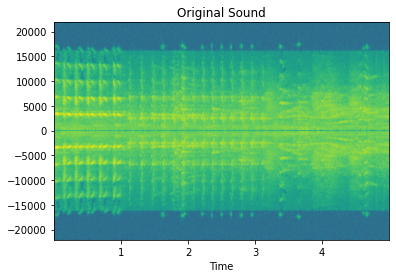

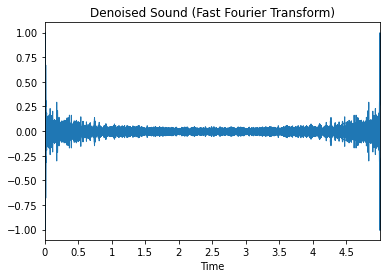

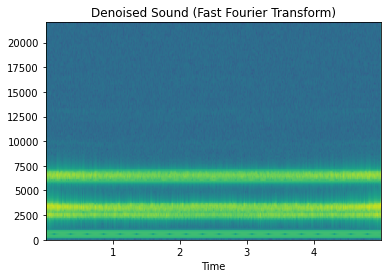

PSNR (Peak signal-to-noise ratio):  57.529339870493274  dB


In [ ]:
import numpy as np
import scipy.io.wavfile as wf
from skimage.filters import threshold_otsu
from scipy.fftpack import fft, ifft

# Read audio file
fs, audio_data = wf.read('/content/original.wav')

# Convert audio data to complex number format
audio_data = audio_data.astype(np.complex64)

# Perform FFT on audio data
fft_data = fft(audio_data)

# Calculate magnitude of FFT data
magnitude = np.abs(fft_data)

# Calculate Otsu threshold
threshold = threshold_otsu(magnitude)

# Apply threshold to magnitude data
denoised_magnitude = np.where(magnitude > threshold, magnitude, 0)

# Perform inverse FFT on denoised data
denoised_data = ifft(denoised_magnitude).astype(np.int16)

# Write denoised audio data to output file
wf.write('/content/output.wav', fs, denoised_data)

plot_wave('/content/original.wav', 'Original Sound')

plot_spectogram(audio_data, fs, 'Original Sound')

wf.write('/content/output.wav', fs, denoised_data)

plot_wave('/content/output.wav', 'Denoised Sound (Fast Fourier Transform)')

plot_spectogram(denoised_data, fs, 'Denoised Sound (Fast Fourier Transform)')

display_psnr()